In [107]:
import os
import numpy as np
import h5py

from torchvision.transforms import transforms
from PIL import Image

Run this cell to decompress the compressed file containing the IM2LATEX handwritten dataset (obtained from https://im2markup.yuntiandeng.com/data/)

In [2]:
DATA_FOLDER = "IM2LATEX-100K-HANDWRITTEN"
DATA_FILE = DATA_FOLDER + ".tgz"
if not os.path.exists(DATA_FOLDER):
  !tar -xzf {DATA_FILE}
else:
  print("Handwritten folder already decompressed.")

Handwritten folder already decompressed.


In [37]:
IMAGES_FOLDER = os.path.join(DATA_FOLDER, "images")
image_filenames = os.listdir(IMAGES_FOLDER)
total_images_all = 99552
assert 99552 == len(image_filenames)

View an image from the dataset:

62247.png


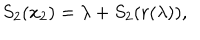

In [76]:
rand_img_filename = np.random.choice(image_filenames)
print(rand_img_filename)
Image.open(os.path.join(IMAGES_FOLDER, rand_img_filename))

In [132]:
for s in sorted(sizes):
    print(s, sizes[s])

6000 2567
6400 4271
8000 5372
9600 5378
10000 3333
11200 4871
12000 2175
12800 4126
14000 2004
14400 3256
16000 1738
18000 1488
20000 3675
21600 18927
22708 1
24630 1
24831 1
24900 1
25854 1
26592 1
26697 1
27093 1
27370 1
27522 1
27608 1
27621 1
28458 1
28892 1
29070 1
29088 1
29472 1
29546 1
30155 1
30870 1
31654 1
31941 1
32096 1
32200 1
32690 1
34153 1
34486 1
35640 1
35970 1
36000 5450
37230 1
37713 1
37835 1
38211 1
38880 1
39312 1
39396 1
39433 1
39809 1
39935 1
40327 1
40480 1
40655 1
40850 1
41100 1
41160 1
41310 1
41454 1
41640 1
41943 1
42140 1
42441 1
42484 1
42718 2
42864 1
43316 1
44118 2
44165 1
44308 1
44334 1
44495 1
44574 1
44626 1
44668 1
44850 1
44968 1
44976 1
45024 1
45100 1
45227 1
45320 1
45360 1
45390 1
45472 1
45576 1
45686 1
45705 1
45717 1
45797 1
45916 1
45920 1
45942 1
45960 1
45999 1
46088 1
46116 1
46269 1
46341 1
46360 1
46410 1
46424 1
46455 1
46516 1
46560 1
46690 1
46854 1
46942 1
47196 1
47253 1
47412 1
47583 1
47850 1
48006 1
48110 1
48120 1
48300 

In [129]:
sum([int(k) * v for k, v in sizes.items()])

3373385872

Run this cell to tokenize and normalize the LaTeX formulas, if they haven't already. There will be some errors thrown, since not all formulas in the dataset can be properly parsed. That is okay, those examples are thrown out.

In [12]:
formulas_file = os.path.join(DATA_FOLDER, "formulas.lst")
formulas_norm_file = os.path.join(DATA_FOLDER, "formulas_norm.lst")
if not os.path.exists(formulas_norm_file):
  !python "scripts/preprocessing/preprocess_formulas.py" --mode normalize --input-file {formulas_file} --output-file {formulas_norm_file}
else:
  print("Formulas already normalized.")

2023-12-03 05:16:16,963 root  INFO     Script being executed: c:\Users\immen\Documents\493g\project\preprocessing\scripts\preprocessing\preprocess_formulas.py
A_{ab} \stackrel\mathrm{ def}{\equiv} \frac{\partial ^2L_\mathrm{ q}}{\partial\dot{q}_a^{n_a}\partial \dot{q}_b^{n_b}}. 
A _ { a b } \stackrel 
TypeError: Cannot read properties of undefined (reading 'type')
    at buildGroup (c:\Users\immen\Documents\493g\project\preprocessing\scripts\preprocessing\preprocess_latex.js:386:26)
    at Object.groupTypes.font (c:\Users\immen\Documents\493g\project\preprocessing\scripts\preprocessing\preprocess_latex.js:299:5)
    at buildGroup (c:\Users\immen\Documents\493g\project\preprocessing\scripts\preprocessing\preprocess_latex.js:387:31)
    at buildExpression (c:\Users\immen\Documents\493g\project\preprocessing\scripts\preprocessing\preprocess_latex.js:375:9)
    at Interface.<anonymous> (c:\Users\immen\Documents\493g\project\preprocessing\scripts\preprocessing\preprocess_latex.js:51:13)
   

Run cell below to filter out examples whose images are too big or whose formulas have grammar errors

In [56]:
max_width = 500
max_height = 160
max_tokens = 150

for dataset_type in ("train", "val", "test"):
  dataset_filename = os.path.join(DATA_FOLDER, dataset_type)
  unfiltered_filename = dataset_filename + ".lst"
  filtered_filename = dataset_filename + "_filtered.lst"
  if not os.path.exists(filtered_filename):
    !python scripts/preprocessing/preprocess_filter.py --filter --image-dir {IMAGES_FOLDER} --label-path {formulas_norm_file} --data-path {unfiltered_filename} --output-path {filtered_filename} --max-width {max_width} --max-height {max_height} --max-tokens {max_tokens}
  else:
    print(f"{dataset_type} already filtered.")

2023-12-03 06:37:34,891 root  INFO     Script being executed: c:\Users\immen\Documents\493g\project\preprocessing\scripts\preprocessing\preprocess_filter.py
2023-12-03 06:37:35,042 root  INFO     82314.png discarded due to too many tokens!
2023-12-03 06:37:35,049 root  INFO     32467.png discarded due to large image size!
2023-12-03 06:37:35,051 root  INFO     65597.png discarded due to large image size!
2023-12-03 06:37:35,063 root  INFO     66957.png discarded due to too many tokens!
2023-12-03 06:37:35,065 root  INFO     27367.png discarded due to large image size!
2023-12-03 06:37:35,066 root  INFO     96607.png discarded due to large image size!
2023-12-03 06:37:35,067 root  INFO     70269.png discarded due to large image size!
2023-12-03 06:37:35,068 root  INFO     42868.png discarded due to large image size!
2023-12-03 06:37:35,070 root  INFO     28739.png discarded due to large image size!
2023-12-03 06:37:35,073 root  INFO     39640.png discarded due to large image size!
2023-

Run cell below to generate the vocabulary for the training set

In [57]:
train_filter_filename = os.path.join(DATA_FOLDER, "train_filtered.lst")
vocab_file = os.path.join(DATA_FOLDER, "latex_vocab.txt")
!python scripts/preprocessing/generate_latex_vocab.py --data-path {train_filter_filename} --label-path {formulas_norm_file} --output-file {vocab_file}

2023-12-03 06:38:44,234 root  INFO     Script being executed: c:\Users\immen\Documents\493g\project\preprocessing\scripts\preprocessing\generate_latex_vocab.py
2023-12-03 06:38:45,077 root  INFO     #UNK's: 33
2023-12-03 06:38:45,082 root  INFO     Jobs finished


In [67]:
with open(vocab_file, "r") as vf:
    raw_vocab_words = vf.read().split("\n")
    vocab_words = ["[CLS]", "[EOS]", "[UNK]", "[MASK]", "[NULL]"] + raw_vocab_words
    word_to_idx = dict(zip(vocab_words, range(len(vocab_words))))

print(vocab_words[:20])

['[CLS]', '[EOS]', '[UNK]', '[MASK]', '[NULL]', '!', '"', '&', "'", '(', ')', '*', '+', ',', '-', '--', '---', '.', '/', '0']


In [87]:
with open(formulas_norm_file, "r") as ff:
    text_formulas = ff.read().split("\n")[:-1]
token_formulas = [l.split(" ") for l in text_formulas]

for i in range(10):
    print(token_formulas[i])

['d', 's', '^', '{', '2', '}', '=', '(', '1', '-', '{', '\\frac', '{', 'q', 'c', 'o', 's', '\\theta', '}', '{', 'r', '}', '}', ')', '^', '{', '\\frac', '{', '2', '}', '{', '1', '+', '\\alpha', '^', '{', '2', '}', '}', '}', '\\lbrace', 'd', 'r', '^', '{', '2', '}', '+', 'r', '^', '{', '2', '}', 'd', '\\theta', '^', '{', '2', '}', '+', 'r', '^', '{', '2', '}', 's', 'i', 'n', '^', '{', '2', '}', '\\theta', 'd', '\\varphi', '^', '{', '2', '}', '\\rbrace', '-', '{', '\\frac', '{', 'd', 't', '^', '{', '2', '}', '}', '{', '(', '1', '-', '{', '\\frac', '{', 'q', 'c', 'o', 's', '\\theta', '}', '{', 'r', '}', '}', ')', '^', '{', '\\frac', '{', '2', '}', '{', '1', '+', '\\alpha', '^', '{', '2', '}', '}', '}', '}', '}', '\\,', '.']
['\\widetilde', '\\gamma', '_', '{', '\\mathrm', '{', 'h', 'o', 'p', 'f', '}', '}', '\\simeq', '\\sum', '_', '{', 'n', '>', '0', '}', '\\widetilde', '{', 'G', '}', '_', '{', 'n', '}', '{', '\\frac', '{', '(', '-', 'a', ')', '^', '{', 'n', '}', '}', '{', '2', '^', '{', '

In [156]:
valid_image_names = set()
for dataset_type in ("train", "val", "test"):
  dataset_info = os.path.join(DATA_FOLDER, dataset_type + "_filtered.lst")
  with open(dataset_info, "r") as dsf:
    lines = dsf.read().split("\n")
  valid_image_names.update([l.split(" ")[0] for l in lines if len(l) > 0])

In [160]:
len(valid_image_names)

85362

In [158]:
sizes = {}
dims = {}
for img_filename in image_filenames:
    if img_filename not in valid_image_names:
        continue
    
    with Image.open(os.path.join(IMAGES_FOLDER, img_filename)) as i:
        size = i.width * i.height
        if size not in sizes:
            sizes[size] = 0
        sizes[size] += 1
        dim = (i.height, i.width)
        if dim not in dims:
            dims[dim] = 0
        dims[dim] += 1

In [159]:
for d in sorted(dims, key=lambda a: a[0] * a[1]):
    if d[0] <= max_height and d[1] <= max_width:
        print(d, dims[d])

(50, 120) 2562
(40, 160) 4263
(40, 200) 5370
(40, 240) 5371
(50, 200) 3326
(40, 280) 4866
(50, 240) 2173
(40, 320) 4116
(50, 280) 2000
(40, 360) 3250
(50, 320) 1729
(50, 360) 1485
(50, 400) 3665
(60, 360) 18886
(100, 360) 5360
(100, 500) 12835
(160, 400) 4105


In [ ]:
small_height, small_width = 50, 240
medium_height, medium_width = 60, 360

In [116]:
datasets = {}
for dataset_type in ("train", "val", "test"):
  dataset_info = os.path.join(DATA_FOLDER, dataset_type + "_filtered.lst")
  with open(dataset_info, "r") as dsf:
    lines = dsf.read().split("\n")
  img_and_idx = [l.split(" ") for l in lines if len(l) > 0]

  num_examples = len(img_and_idx)
  img_arrays = 254 * np.ones((num_examples, 1, max_height, max_width), dtype=np.uint8)
  img_dimensions = np.zeros((num_examples, 2), dtype=np.int16)
  tokens = word_to_idx["[NULL]"] * np.ones((num_examples, max_tokens + 2), dtype=np.int16)
  tokens[:, 0] = word_to_idx["[CLS]"]
  img_filenames = np.zeros((len(img_and_idx,)), dtype=np.int32)
  formula_idxs = np.zeros((len(img_and_idx,)), dtype=np.int32)

  for i, (img_filename, formula_idx) in enumerate(img_and_idx):
    img = Image.open(os.path.join(IMAGES_FOLDER, img_filename))

    img_to_tensor = transforms.Compose([
      transforms.PILToTensor(),
      transforms.Grayscale(num_output_channels=1)
    ])
    img_tensor = img_to_tensor(img)
    img_arrays[i, 0, :img.height, :img.width] = img_tensor

    img_dimensions[i, 0] = img.height
    img_dimensions[i, 1] = img.width

    token_formula = token_formulas[int(formula_idx)]
    for j, token in enumerate(token_formula):
      tokens[i, j + 1] = word_to_idx.get(token, word_to_idx["[UNK]"])

    img_filenames[i] = int(img_filename[:-4])
    formula_idxs[i] = int(formula_idx)

  datasets[dataset_type] = {
    "N": num_examples,
    "max_width": max_width,
    "max_height": max_height,
    "max_tokens": max_tokens,
    "images": img_arrays,
    "tokens": tokens,
    "img_dimensions": img_dimensions,
    "img_filenames": img_filenames,
    "formula_idxs": formula_idxs
  }

The saved file will be pretty large (~6.4 GB), since most images don't have maximum dimensions. But, zipping it will reduce its size significantly (~180 MB). Be sure to zip it if you send it elsewhere!

In [122]:
save_to_filename = "handwritten_dataset.h5"
with h5py.File(save_to_filename, "w") as f:
    for dataset_type in ("train", "val", "test"):
        dataset_group = f.create_group(dataset_type)
        for attr in ("N", "max_width", "max_height", "max_tokens"):
            dataset_group.attrs[attr] = datasets[dataset_type][attr]
        
        for subdset_name in ("images", "tokens", "img_dimensions", "img_filenames", "formula_idxs"):
            dataset_value = datasets[dataset_type][subdset_name]
            subdset = dataset_group.create_dataset(subdset_name, dataset_value.shape, str(dataset_value.dtype))
            subdset[()] = dataset_value

In [167]:
with open("vocab_to_idx.txt", "w+") as f:
    print("\n".join([f"{word} {idx}" for word, idx in word_to_idx.items()]), end="", file=f)

In [ ]:
# imports
import os
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np

# For reading .lst files
!pip install lstpy
import lstpy

USE_GPU = True
dtype = torch.float32 # We will be using float throughout this tutorial.

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss.
print_every = 100
print('using device:', device)

using device: cuda


# Data Processing

Define a simple .lst --> list data structure converter

In [ ]:
# converts a .lst file to a list
# -> formula mode is pure string conversion by line
# -> label mode separates the input into img name (data[i][0][]) and formula index (data[i][][0])
def process_lst(file_path, mode = 'formula'):
  data = []

  if (mode == 'formula'):
    with open(file_path, 'r', newline="\n") as in_file:
      for line in in_file:
        data.append(line)

  elif (mode == 'label'):
    with open(file_path, 'r', newline="\n") as in_file:
      for line in in_file:
        tokens = line.split()
        tuple(map(tuple, tokens))
        data.append(tokens)

  else:
    print("Unkown modality given. Use 'formula' or 'label' tags")

  return data

## Vocab Generation

Here we generate the vocab list. Used Deng et. al.'s python script for parsing and loading vocabulary from the training set. https://github.com/harvardnlp/im2markup/blob/master/scripts/preprocessing/generate_latex_vocab.py

In [ ]:
# generate latex vocabulary if not done already
path = 'datasets/preprocessed_data2/latex_vocab.txt' # where you want to output vocab file

%cd '/content/drive/Shared drives/CSE 493G1 Text to Latex /'
if not os.path.exists(path):
  !python preprocessing/generate_latex_vocab.py --data-path datasets/preprocessed_data/train_filter.lst --label-path datasets/preprocessed_data/formulas_norm.lst --output-file datasets/preprocessed_data/latex_vocab.txt
else:
  print("vocab already generated at " + path)

/content/drive/Shared drives/CSE 493G1 Text to Latex 
2023-12-03 04:06:27,855 root  INFO     Script being executed: /content/drive/Shared drives/CSE 493G1 Text to Latex /preprocessing/generate_latex_vocab.py
Traceback (most recent call last):
  File "/content/drive/Shared drives/CSE 493G1 Text to Latex /preprocessing/generate_latex_vocab.py", line 80, in <module>
    main(sys.argv[1:])
  File "/content/drive/Shared drives/CSE 493G1 Text to Latex /preprocessing/generate_latex_vocab.py", line 47, in main
    assert os.path.exists(data_path), data_path
AssertionError: datasets/preprocessed_data/train_filter.lst


In [ ]:
# convert latex vocab into python list
vocab_path = "/content/drive/Shareddrives/CSE 493G1 Text to Latex /datasets/preprocessed_data/latex_vocab.txt"
vocab = process_lst(vocab_path)

# print a few of the items
denominator = 20
for i in range(len(vocab) // denominator):
  print(vocab[denominator * i])

!

2

D

W

\Biggl

\Omega

\amalg

\bigl

\cdotp

\diamondsuit

\flat

\i

\lceil

\lgroup

\mathsf

\not

\parbox

\raisebox

\right]

\sl

\sum

\top

\vee

`



## Formula Processing

Here we translate the normalized formulas from a .lst file to a list for easier usage. Deng et. al. note that some latex formulas produce indentical outputs. In the formula processing script they provided, identical outputs with different inputs now have the same input to avoid bad training.
https://github.com/harvardnlp/im2markup/blob/master/scripts/preprocessing/preprocess_formulas.py


In [ ]:
formula_path = "/content/drive/Shareddrives/CSE 493G1 Text to Latex /datasets/preprocessed_data/formulas_norm.lst"
formulas = process_lst(formula_path)

# print a few of the formulas
denominator = 20000
for i in range(len(formulas) // denominator):
  formula_idx = denominator * i + 20
  print("formula " + str(formula_idx) + "): " + formulas[formula_idx])

formula 20): { \frac { d V } { d \Phi } } = - { \frac { w \Phi } { \Phi _ { \! _ { 0 } } ^ { 2 } } } \, .

formula 20020): f ^ { ( \kappa ) } ( z ) = \frac { 1 } { \kappa } \Bigl ( 1 - \operatorname { e x p } ( - \kappa \operatorname { t a n } ^ { - 1 } z ) \Bigr ) = z - \frac { \kappa } { \sqrt { 2 } } \frac { z ^ { 2 } } { \sqrt { 2 } } + \frac { \kappa ^ { 2 } - 2 } { 2 \sqrt { 3 } } \frac { z ^ { 3 } } { \sqrt { 3 } } + \cdots .

formula 40020): \partial ^ { \mu } j _ { \mu } ^ { 5 } = - 2 m \bar { \Psi } i \gamma _ { 5 } \Psi

formula 60020): { \frac { 1 } { i } } B ^ { - 1 } d B = e ^ { a } P _ { a } + \omega ^ { a b } M _ { a b } .

formula 80020): \phi _ { d + 2 } ( t , r ) = - \frac { 1 } { r } \partial _ { r } \phi _ { d } ( t , r )



## Image Processing

First we get the images, which minimize the white space via cropping, and images of similar sizes are grouped to facilitate batching.

In [ ]:
# unpack images if not done already
%cd '/content/drive/Shared drives/CSE 493G1 Text to Latex /'
out_dir = "datasets/preprocessed_data2/processed_images"

if not os.path.isdir(out_dir):
  !tar -xzvf "datasets/preprocessed_data2/formula_images.tar.gz" -C "datasets/preprocessed_data2/"
else:
  print("data already processed!")

Streaming output truncated to the last 5000 lines.
formula_images/2c4cd73055.png
formula_images/425f2f5577.png
formula_images/98214e296a.png
formula_images/25f462ed94.png
formula_images/701c6f9c52.png
formula_images/ef82b34577.png
formula_images/76b6efad54.png
formula_images/31e323fac7.png
formula_images/405e6ca2d2.png
formula_images/1929198930.png
formula_images/b690669468.png
formula_images/57c538495f.png
formula_images/7e5171495f.png
formula_images/b10fda5934.png
formula_images/1ccade6143.png
formula_images/63d0e0d26b.png
formula_images/6f37b467f6.png
formula_images/2ef8e9d69a.png
formula_images/2f0bb37b9a.png
formula_images/17f85ef8ef.png
formula_images/5a61ce6d95.png
formula_images/2e11f2aaef.png
formula_images/32d3ac6b2d.png
formula_images/22fcfae3c6.png
formula_images/6f383dc061.png
formula_images/3568618752.png
formula_images/51716bbf50.png
formula_images/6940f5e6c6.png
formula_images/4654b59f3e.png
formula_images/35fd0fe238.png
formula_images/17b04c8610.png
formula_images/535e

Now we process the train, test, and validation lists.
- im2latex_[...].lst files
    - Each line is separate generated image per formula
    - Line structure: "[image_name] [formula_idx]"
        - formula_idx is the line number of the formula in im2latex_formulas.lst
        - image_name is the name of rendered image [...].png

In [ ]:
# Process training list
train_path = "/content/drive/Shareddrives/CSE 493G1 Text to Latex /datasets/preprocessed_data2/im2latex_train.lst"
train_data = process_lst(train_path, 'label')

denominator = 10000
for i in range(len(train_data) // denominator):
  formula_idx = denominator * i
  data_pair = train_data[formula_idx][0] + " " + train_data[formula_idx][1]
  print("training data " + str(formula_idx) + "): " + data_pair)

training data 0): 1 60ee748793
training data 10000): 12374 2855c25bdf
training data 20000): 24753 3c349e7d7f
training data 30000): 37049 47c851125c
training data 40000): 49446 5ac178e31e
training data 50000): 61807 18aa5c79cc
training data 60000): 74072 865c57310a
training data 70000): 86430 d7345ed40e


In [ ]:
# Process validation list
val_path = "/content/drive/Shareddrives/CSE 493G1 Text to Latex /datasets/preprocessed_data2/im2latex_validate.lst"
val_data = process_lst(val_path, 'label')

denominator = 1100
for i in range(len(val_data) // denominator):
  formula_idx = denominator * i
  data_pair = val_data[formula_idx][0] + " " + val_data[formula_idx][1]
  print("validation data " + str(formula_idx) + "): " + data_pair)

validation data 0): 0 5abbb9b19f
validation data 1100): 22419 1e0028fc68
validation data 2200): 6776 6f13a4a239
validation data 3300): 43467 7910909aa1
validation data 4400): 40691 5d9d67ff27
validation data 5500): 30434 3d8fc95023
validation data 6600): 88382 4f4c080654
validation data 7700): 26859 1fc7a408be


In [ ]:
# Process testing list
test_path = "/content/drive/Shareddrives/CSE 493G1 Text to Latex /datasets/preprocessed_data2/im2latex_test.lst"
test_data = process_lst(test_path, 'label')

denominator = 1300
for i in range(len(test_data) // denominator):
  formula_idx = denominator * i
  data_pair = test_data[formula_idx][0] + " " + test_data[formula_idx][1]
  print("testing data " + str(formula_idx) + "): " + data_pair)

testing data 0): 32771 7944775fc9
testing data 1300): 101813 3d074c8835
testing data 2600): 40177 62e990e46d
testing data 3900): 44421 40d8f5e102
testing data 5200): 48503 46422064f9
testing data 6500): 19940 3f2a3aec4d
testing data 7800): 57067 3ff112e35c


In [ ]:
# Get Small dataset
train_size = len(train_data)
val_size = len(val_data)
test_size = len(test_data)

SMALL_NUM_TRAIN = int(0.1*train_size)
SMALL_NUM_VAL = int(0.05*train_size)

train_loader_small = DataLoader(train_data, batch_size=100,
                          sampler=sampler.SubsetRandomSampler(range(SMALL_NUM_TRAIN)))
val_loader_small = DataLoader(val_data, batch_size=100,
                        sampler=sampler.SubsetRandomSampler(range(SMALL_NUM_VAL)))

# print a single train batch
print("Single training batch: ")
for img_name, formula_idx in train_loader_small:
  print(img_name)
  print(formula_idx)
  break

print("\nSingle validation batch: ")
# print a single validation batch
for img_name, formula_idx in val_loader_small:
  print(img_name)
  print(formula_idx)
  break


Single training batch: 
('633f51ac0b.png', '336ede35b5.png', '679024ce06.png', '3190c3ffaf.png', '230b1b95ee.png', '1e795e0959.png', '546fa02679.png', '73efb945b0.png', '68c434b34d.png', '26cbc91aba.png', '3507660a87.png', '677956f1b8.png', '54f6bb07e1.png', '3012ee2142.png', '5c01b8b718.png', '12c14de83f.png', '33ac550665.png', '4d01c5844a.png', '3177fda72e.png', '38c3dfaccf.png', '71eb78be7f.png', '75750b60f4.png', '74056148c7.png', '671659f124.png', '5855e27d19.png', '7f9885595d.png', '1afe9aa4cc.png', '4f44090152.png', '642baf878a.png', '6f941f5e9f.png', '3cc6924774.png', '4a15f61fa2.png', '767cddff98.png', '54eabf9cf3.png', '1c9910aae0.png', '34a3422e80.png', '5ccce6ec4b.png', '3f90a99bb1.png', '4ae0099f82.png', '7dbffdc77d.png', '161b50c7a8.png', '7cc24f59f3.png', '7022f44bc7.png', '2440895f67.png', '2350414e35.png', '58901d7108.png', '89817aff32.png', '2001128de7.png', '2ef7603fd0.png', '395b1c7b93.png', '1eab8fbeaf.png', '6b87118860.png', '7b7972f6e1.png', '5589bcc74b.png', '3c

Let's verify that our formulas are matching to our images.

In [ ]:
from IPython.display import Image
img_path = "datasets/preprocessed_data2/formula_images/"

In [ ]:
imgs = os.listdir(img_path)
print(len(imgs))

FileNotFoundError: ignored

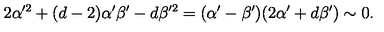

In [ ]:
Image(img_path + imgs[0])

In [ ]:
# Run this cell to see some training images and formulas.
%cd '/content/drive/Shared drives/CSE 493G1 Text to Latex /'

train_idx = int(np.random.rand() * len(train_data))
img_name, formula_idx = train_data[train_idx]
img_full_filename = os.path.join(img_path, img_name)
print(f"training example {formula_idx}: formula {formula_idx}: at {img_full_filename}")
print("formula: " + formulas[int(formula_idx)])
img = Image(img_full_filename)
print(img_name in imgs)
# Image(img_path + img_name)

/content/drive/Shared drives/CSE 493G1 Text to Latex 
training example 13917: formula 12372: at datasets/preprocessed_data/processed_imgs/6855e25e3e.png
formula: \xi ^ { i } \mapsto \frac { \partial } { \partial x _ { i } } , \qquad i = 1 , \dots , n .

True


In [ ]:
print(len(train_data))

75275


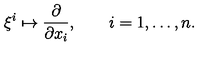

In [ ]:
img

In [ ]:
img_name in imgs

False

In [ ]:
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
from tokenizers.processors import TemplateProcessing
from tokenizers.pre_tokenizers import WhitespaceSplit
# Create a BPE model

tokens = {"[UNK]":0,"[CLS]":1, "[EOS]":2, "[PAD]":3, "[MASK]":4}
# vocab.remove('\\\n')
# vocab.append('\\\n')
for i, v in enumerate(vocab):
  tokens[v[:-1]] = i+5

wl_model = models.WordLevel(tokens, unk_token="[UNK]")

tokenizer = Tokenizer(wl_model)
# print(tokenizer.add_tokens(vocab))
# print(tokenizer.add_tokens(["[UNK]","[CLS]", "[EOS]", "[PAD]", "[MASK]"]))
print(tokenizer.get_vocab_size())
tokenizer.pre_tokenizer = WhitespaceSplit()
tokenizer.post_processor = TemplateProcessing(
    single="[CLS] $A [EOS]",
    special_tokens=[
        ("[CLS]", tokenizer.token_to_id("[CLS]")),
        ("[EOS]", tokenizer.token_to_id("[EOS]")),
    ],
)
print(tokens)
print("formula: " + formulas[int(formula_idx)])

output = tokenizer.encode(formulas[int(formula_idx)])
print(output.tokens)
print(tokenizer.decode(output.ids))


501
{'[UNK]': 0, '[CLS]': 1, '[EOS]': 2, '[PAD]': 3, '[MASK]': 4, '!': 5, '"': 6, '&': 7, "'": 8, '(': 9, ')': 10, '*': 11, '+': 12, ',': 13, '-': 14, '--': 15, '---': 16, '.': 17, '/': 18, '0': 19, '0.1': 20, '0.14': 21, '0.4': 22, '0.5': 23, '1': 24, '2': 25, '3': 26, '3.1': 27, '3.2': 28, '4': 29, '5': 30, '6': 31, '7': 32, '8': 33, '8.5': 34, '9': 35, ':': 36, ';': 37, '<': 38, '=': 39, '>': 40, '?': 41, 'A': 42, 'B': 43, 'C': 44, 'D': 45, 'E': 46, 'F': 47, 'G': 48, 'H': 49, 'I': 50, 'J': 51, 'K': 52, 'L': 53, 'M': 54, 'N': 55, 'O': 56, 'Object]': 57, 'P': 58, 'Q': 59, 'R': 60, 'S': 61, 'T': 62, 'U': 63, 'V': 64, 'W': 65, 'X': 66, 'Y': 67, 'Z': 68, '[': 69, '[object': 70, '\\': 71, '\\!': 72, '\\#': 73, '\\&': 74, "\\'": 75, '\\*': 76, '\\,': 77, '\\-': 78, '\\/': 79, '\\:': 80, '\\;': 81, '\\AA': 82, '\\Big': 83, '\\Bigg': 84, '\\Biggl': 85, '\\Biggm': 86, '\\Biggr': 87, '\\Bigl': 88, '\\Bigm': 89, '\\Bigr': 90, '\\Delta': 91, '\\Downarrow': 92, '\\Gamma': 93, '\\Huge': 94, '\\Im'

TypeError: ignored

# Transformer Model

In [ ]:
# Set up swin transformer model
from transformers import AutoImageProcessor, Swinv2Model
image_processor = AutoImageProcessor.from_pretrained("microsoft/swinv2-base-patch4-window8-256")
swin_model = Swinv2Model.from_pretrained("microsoft/swinv2-base-patch4-window8-256")

# process images to put in Swinv2 Model
# inputs = image_processor(image, return_tensors="pt")

# with torch.no_grad():
#     outputs = model(**inputs)

preprocessor_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


config.json:   0%|          | 0.00/69.9k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/352M [00:00<?, ?B/s]

In [ ]:
# Code for custom output layer  not necessary since the transformer will output the right values
from transformers import VisionEncoderDecoderModel, TrOCRForCausalLM, AutoConfig, TokenClassifierOutput
class CustomOutputLayer(nn.Module):
  def __init__(self, num_labels):
    super(CustomTROCR,self).__init__()
    self.num_labels = num_labels



    # put linear classifier
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [ ]:
# Load pretrained decoder
checkpoint = "microsoft/trocr-base-handwritten"

decoder = TrOCRForCausalLM.from_pretrained(checkpoint)
model = VisionEncoderDecoderModel(encoder=swin_model, decoder=decoder)

# example code at https://github.com/huggingface/transformers/blob/514de24abfd4416aeba6a6455ad5920f57f3567d/src/transformers/models/trocr/modeling_trocr.py#L729

# modify vision encoder decoder to change classification
# model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
# model.config.pad_token_id = processor.tokenizer.pad_token_id
# model.config.vocab_size = model.config.decoder.vocab_size


In [ ]:
# train
model_folder = "/content/drive/Shareddrives/CSE 493G1 Text to Latex/models/swimnet_model"
training_args = TrainingArguments(
    output_dir=model_folder,
    fp16=True,
    overwrite_output_dir=True,
    evaluation_strategy = 'epoch',
    num_train_epochs=TRAIN_EPOCHS,
    learning_rate=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY,
    per_device_train_batch_size=TRAIN_BATCH_SIZE,
    per_device_eval_batch_size=VALID_BATCH_SIZE,
    save_steps=8192,
    #eval_steps=4096,
    save_total_limit=1,
)
# Create the trainer for our model
# just need to create a subclass to change the loss
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collator,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)
# Train the model
trainer.train()

In [ ]:
# save model
trainer.save_model(model_folder)

In [ ]:
#UTILS
# Flatten
class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)

# Training and accuracy functions
def check_acc(model, loader):
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    return acc

def train_model(model, optimizer, loader_train, loader_val, epochs=1, print_every = 100):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    loss = []
    train_acc = []
    val_acc = []
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            loss.append(loss)
            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                print("Checking Training Error")
                acc = check_acc(loader_train, model)
                train_acc.append(acc)
                print("Checking Validation Error")
                acc = check_acc(loader_val, model)
                val_acc.append(acc)
                print()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

In [ ]:
# Model Search
lrs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
lrs = [1e-2]

channel_1 = 16
channel_2 = 10

for lr in lrs:

  model = nn.Sequential(
      nn.Conv2d(3, channel_1, 5, 1, 2),
      nn.ReLU(),
      nn.Conv2d(channel_1, channel_2, 3, 1, 1),
      nn.ReLU(),
      Flatten(),
      nn.Linear(channel_2*H*W, 1000),
      nn.ReLU(),
      nn.Linear(1000, classes)
  )
  optimizer = optim.AdamW(model.parameters(), lr=lr)
  train_model(model, optimizer, loader_train_s, loader_val_s, epochs=1, print_every = 100)


In [ ]:
# Train Best model
best_model = model
best_optim = optim.AdamW(model.parameters(), lr=1e-2)
train_model(best_model, best_optim, loader_train, loader_val, epochs=20, print_every = 500)

In [ ]:
# Save Best Model
torch.save(best_model.state_dict(), "/content/drive/Shareddrives/CSE 493G1 Text to Latex /models/char_model.pt")
# Best Model
print("Checking Training Error")
check_acc(loader_train, best_model)
print("Checking Validation Error")
check_acc(loader_val, best_model)
print()




In [ ]:
# Test



In [ ]:
# Final Test
check_acc(loader_test, best_model)